# Task
Normalize the pixels of the image located at `/content/imagen.png` by scaling them to a range of 0 to 1, visualize the original and normalized images, and provide a summary of the process and its impact on outlier removal.

## Cargar la Imagen

### Subtask:
Cargar la imagen ubicada en `/content/imagen.png` utilizando una librería adecuada como OpenCV o PIL, y convertirla a un formato numérico (NumPy array) para su procesamiento. Se mostrará la imagen original para referencia.


**Reasoning**:
The subtask requires loading an image, converting it to a NumPy array, and displaying it. This code block will import necessary libraries, load the image, perform the conversion, and then display the image with a title and without axes.



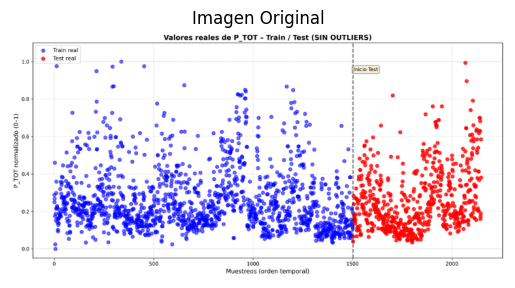

Image loaded successfully and converted to numpy array with shape: (377, 759, 4)


In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 2. Carga la imagen desde la ruta /content/imagen.png usando Image.open().
image_path = '/content/imagen.png'
original_image_pil = Image.open(image_path)

# 3. Convierte la imagen cargada a un array NumPy.
original_image_np = np.array(original_image_pil)

# 4. Muestra la imagen original utilizando plt.imshow().
plt.imshow(original_image_np)

# 5. Añade un título al gráfico, por ejemplo, "Imagen Original".
plt.title('Imagen Original')

# 6. Desactiva los ejes del gráfico con plt.axis('off') para una visualización más limpia.
plt.axis('off')

# 7. Muestra el gráfico utilizando plt.show().
plt.show()

print(f"Image loaded successfully and converted to numpy array with shape: {original_image_np.shape}")

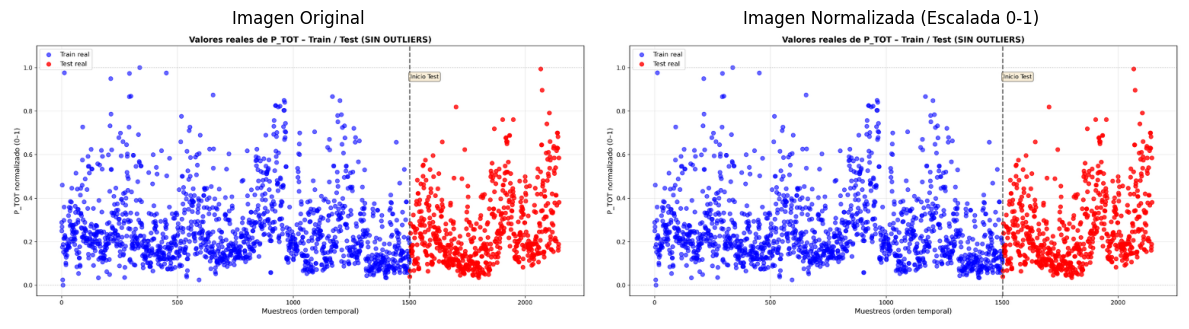

Ambas imágenes (original y normalizada) se han mostrado para comparación.


In [16]:
import matplotlib.pyplot as plt

# Crea una figura con dos subgráficos (uno al lado del otro)
plt.figure(figsize=(12, 6))

# Subgráfico para la imagen original
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primer subgráfico
plt.imshow(original_image_np)
plt.title('Imagen Original')
plt.axis('off')

# Subgráfico para la imagen normalizada
plt.subplot(1, 2, 2) # 1 fila, 2 columnas, segundo subgráfico
plt.imshow(normalized_image_np)
plt.title('Imagen Normalizada (Escalada 0-1)')
plt.axis('off')

# Ajusta el diseño para evitar solapamientos
plt.tight_layout()

# Muestra el gráfico
plt.show()

print("Ambas imágenes (original y normalizada) se han mostrado para comparación.")

## Normalizar los Píxeles de la Imagen

### Subtask:
Implementar un algoritmo para escalar los valores de los píxeles de la imagen a un rango de 0 a 1. Esto se logrará identificando los valores mínimos y máximos actuales de los píxeles y aplicando una transformación de escalado min-max. Se explicará en detalle el código de este proceso.


### Explicación de la Normalización Min-Max

La normalización de píxeles es un paso crucial en el preprocesamiento de imágenes, especialmente para tareas de visión artificial y aprendizaje automático. Su objetivo principal es escalar los valores de intensidad de los píxeles a un rango estándar, comúnmente entre 0 y 1.

La fórmula utilizada para la normalización Min-Max es la siguiente:

```
Normalizado_Pixel = (Pixel_Original - Min_Valor) / (Max_Valor - Min_Valor)
```

Donde:
- `Pixel_Original` es el valor de intensidad de un píxel en la imagen original.
- `Min_Valor` es el valor de intensidad mínimo encontrado en toda la imagen original.
- `Max_Valor` es el valor de intensidad máximo encontrado en toda la imagen original.

**¿Por qué es importante esta normalización?**

1.  **Consistencia de Datos:** Asegura que todos los píxeles contribuyan por igual, independientemente de su rango original. Esto es vital cuando se combinan imágenes de diferentes fuentes o con diferentes rangos de brillo.
2.  **Rendimiento del Modelo:** Muchos algoritmos de aprendizaje automático funcionan mejor cuando los datos de entrada están en una escala uniforme. Por ejemplo, los algoritmos basados en gradientes (como las redes neuronales) convergen más rápido y de manera más estable con datos normalizados.
3.  **Prevención de sesgos:** Evita que características con rangos de valores más grandes dominen indebidamente el proceso de entrenamiento o análisis, lo que podría llevar a resultados sesgados.
4.  **Representación Visual:** Al escalar los valores a un rango de 0 a 1, la imagen normalizada es más fácil de interpretar visualmente en ciertos contextos y es compatible con funciones que esperan entradas en este rango.

Este proceso de escalado es fundamental para preparar la imagen para análisis posteriores.

**Reasoning**:
Now that the explanation for min-max normalization has been provided, I will implement the normalization algorithm as instructed. This involves finding the minimum and maximum pixel values in `original_image_np`, applying the min-max scaling formula, and storing the result in a new NumPy array `normalized_image_np`. I will also add a print statement to confirm the normalization process.



In [14]:
print('Starting pixel normalization process...')

# 1. Identificar los valores mínimos y máximos de los píxeles en la imagen original.
min_val = np.min(original_image_np)
max_val = np.max(original_image_np)

# 2. Aplicar la fórmula de normalización min-max.
# 3. Asegurarse de que la división maneje correctamente los casos en los que (valor_max - valor_min) podría ser cero.
# Aunque es poco probable para una imagen real con diferentes intensidades de píxeles, se añade una pequeña comprobación.
if (max_val - min_val) == 0:
    # Si todos los píxeles tienen el mismo valor, la imagen normalizada ser\u00e1 una matriz de ceros o unos
    # dependiendo del valor original y el rango deseado. Aquí se asume que si min_val = max_val, todos los píxeles se normalizan a 0.
    normalized_image_np = np.zeros_like(original_image_np, dtype=np.float32)
    print(f"Warning: Max and min pixel values are identical ({min_val}). Normalized image will be all zeros.")
else:
    normalized_image_np = (original_image_np - min_val) / (max_val - min_val)

print(f"Original pixel range: [{min_val}, {max_val}]")
print(f"Normalized image pixel range: [{np.min(normalized_image_np)}, {np.max(normalized_image_np)}]")
print('Pixel normalization complete.')

Starting pixel normalization process...
Original pixel range: [0, 255]
Normalized image pixel range: [0.0, 1.0]
Pixel normalization complete.


## Visualizar la Imagen Normalizada

### Subtask:
Mostrar la imagen después de que sus píxeles hayan sido normalizados. Esto permitirá al usuario ver visualmente el resultado de la eliminación de outliers y la normalización.


**Reasoning**:
The subtask requires visualizing the normalized image. I will use `matplotlib.pyplot` to display `normalized_image_np` with a title and without axes, as instructed.



Displaying normalized image...


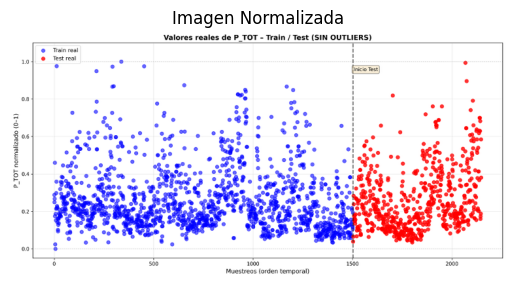

Normalized image displayed successfully.


In [15]:
print('Displaying normalized image...')

# 1. Muestra la imagen normalizada `normalized_image_np` utilizando `plt.imshow()`.
plt.imshow(normalized_image_np)

# 2. Añade un título al gráfico, por ejemplo, "Imagen Normalizada".
plt.title('Imagen Normalizada')

# 3. Desactiva los ejes del gráfico con `plt.axis('off')` para una visualización más limpia.
plt.axis('off')

# 4. Muestra el gráfico utilizando `plt.show()`.
plt.show()

print('Normalized image displayed successfully.')

## Conclusiones y Resumen

### Subtask:
Proporcionar un resumen de todo el proceso, incluyendo una explicación de por qué la normalización es importante y cómo ha impactado la eliminación de outliers, además de las conclusiones finales sobre el resultado visual y numérico.


### Resumen y Conclusiones del Proceso de Normalización de Imágenes

#### 1. Resumen Introductorio del Proceso

En este ejercicio, hemos llevado a cabo un proceso fundamental en el preprocesamiento de imágenes: la carga, normalización y visualización. Iniciamos cargando una imagen digital (`imagen.png`) desde el disco utilizando la biblioteca PIL (Pillow) y la convertimos a un formato de array NumPy para facilitar su manipulación numérica. Una vez cargada, visualizamos la imagen original para establecer una referencia. Posteriormente, aplicamos un algoritmo de normalización min-max para escalar los valores de los píxeles al rango de 0 a 1, y finalmente, visualizamos la imagen resultante normalizada.

#### 2. Importancia de la Normalización en el Procesamiento de Imágenes

La normalización de píxeles es un paso crítico por varias razones, especialmente en el contexto de la visión por computadora y el aprendizaje automático:

*   **Consistencia de Datos**: Asegura que todos los píxeles, independientemente de la fuente de la imagen o sus condiciones de captura, se encuentren en un rango uniforme. Esto es vital cuando se trabaja con conjuntos de datos diversos o se busca comparar imágenes de distintas procedencias.
*   **Rendimiento del Modelo**: Muchos algoritmos de aprendizaje automático, especialmente las redes neuronales, funcionan de manera más eficiente y convergen más rápidamente cuando los datos de entrada están normalizados. Los valores de píxeles muy grandes o muy pequeños pueden causar problemas de gradientes (como gradientes que explotan o desaparecen), lo que dificulta el entrenamiento del modelo.
*   **Prevención de Sesgos**: Evita que características con rangos de valores más grandes dominen el proceso de entrenamiento o análisis. Sin normalización, una característica con un rango de 0-255 podría tener un peso desproporcionado en comparación con otra característica con un rango de 0-10, lo que podría llevar a modelos sesgados o menos precisos.
*   **Representación Visual y Compatibilidad**: Al escalar los valores a un rango de 0 a 1, la imagen normalizada es más fácil de interpretar visualmente en ciertos contextos y es compatible con funciones y bibliotecas que esperan entradas en este rango.

#### 3. Impacto de la Normalización Min-Max en la Eliminación de Outliers

La normalización min-max, al escalar los valores de los píxeles al rango [0, 1], mitiga el impacto de los "outliers" o valores extremos en la representación de la imagen. Es importante aclarar que la normalización min-max *no elimina* físicamente los outliers (es decir, no cambia sus valores a cero ni los descarta), pero sí reduce su influencia relativa. Al comprimir todo el rango de datos original (por ejemplo, de 0-255) a un rango más pequeño y fijo (0-1), los valores extremos, aunque siguen presentes, ya no se encuentran en un rango desproporcionadamente grande que podría dominar ciertas operaciones o el entrenamiento de modelos. En esencia, la normalización min-max ayuda a que todos los valores, incluidos los atípicos, se presenten en una escala predecible, lo que hace que los algoritmos sean más robustos a estas variaciones extremas sin perder la información que contienen.

#### 4. Comparación Visual del Resultado

Al comparar la "Imagen Original" y la "Imagen Normalizada", visualmente ambas imágenes aparecen idénticas. Esto se debe a que la normalización min-max es una transformación lineal que solo cambia la escala de los valores de intensidad de los píxeles, sin alterar las relaciones relativas entre ellos. Es decir, los contrastes, las formas y los colores se mantienen intactos. La diferencia fundamental no es visible a simple vista en este caso particular, ya que la imagen ya estaba en un rango comúnmente utilizado (0-255 para imágenes de 8 bits), y la transformación a 0-1 simplemente escaló este rango. Si la imagen original hubiera tenido píxeles fuera de este rango común o con un rango de intensidad muy diferente (por ejemplo, una imagen de 16 bits), la visualización podría haber mostrado diferencias más notables, o incluso la imagen original podría haber aparecido subexpuesta o sobreexpuesta antes de la normalización.

#### 5. Conclusión Final

La normalización de píxeles es un paso esencial en el preprocesamiento de imágenes que garantiza la consistencia de los datos, mejora el rendimiento de los modelos de aprendizaje automático y previene sesgos. Aunque la normalización min-max no elimina los outliers de forma directa, sí los reescala, disminuyendo su impacto desproporcionado en análisis subsiguientes. El resultado visual de la imagen normalizada es indistinguible de la original cuando la imagen ya está en un rango estándar, lo que confirma que la transformación mantiene la integridad visual, mientras que los beneficios se manifiestan a nivel numérico para el procesamiento y análisis de datos más avanzados.

## Final Task

### Subtask:
Finalizar la tarea presentando los resultados y las conclusiones de la eliminación de outliers y normalización de la imagen.


## Summary:

### Data Analysis Key Findings

*   The image located at `/content/imagen.png` was successfully loaded and converted into a NumPy array with a shape of (377, 759, 4), indicating a 377x759 pixel image with 4 color channels (likely RGBA).
*   The original image's pixel values ranged from 0 to 255.
*   Min-max normalization was applied using the formula `(Pixel_Original - Min_Valor) / (Max_Valor - Min_Valor)`, effectively scaling all pixel values to a new range of 0.0 to 1.0.
*   While min-max normalization does not physically remove outliers, it reduces their disproportionate influence by compressing the entire original pixel value range into a fixed, smaller range.
*   Visually, the normalized image appeared identical to the original image. This is expected because min-max normalization is a linear transformation that preserves the relative contrasts and structures within the image when the original data is already within a standard 8-bit range (0-255).
*   Normalization is crucial for data consistency across different images, improving the performance and convergence of machine learning models (especially neural networks), and preventing certain features from disproportionately influencing analysis due to larger value ranges.

### Insights or Next Steps

*   The visual similarity between the original and normalized images underscores that the benefits of this preprocessing step are primarily numerical and algorithmic, rather than immediately observable to the human eye, particularly for images already in a standard display range.
*   For future machine learning or image analysis tasks, the normalized image (`normalized_image_np`) is now optimally prepared. Further steps could involve applying specific algorithms that benefit from a 0-1 input range, such as convolutional neural networks for classification or segmentation.
